In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6E82-34BE

 Directory of C:\Users\KUMAR SANU\Assignment\Random forest

03-04-2021  18:56    <DIR>          .
03-04-2021  18:56    <DIR>          ..
02-04-2021  13:52    <DIR>          .ipynb_checkpoints
02-04-2021  13:43            17,023 Company_Data (1).csv
03-04-2021  18:56             8,618 company_RandomForest.ipynb
02-04-2021  13:43            21,837 Fraud_check (1).csv
02-04-2021  13:43             1,378 problem statement(company data) (1).txt
02-04-2021  13:43               133 Problem_statement(Fraudcheck) (1).txt
               5 File(s)         48,989 bytes
               3 Dir(s)  192,903,995,392 bytes free


In [3]:
company=pd.read_csv('Company_Data (1).csv')
company.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Coverting all categrical features into numerical value through label_encoder

In [4]:
#it will convert into number 
label_encoder = preprocessing.LabelEncoder() 
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 

In [5]:
#it will convert into number 
label_encoder = preprocessing.LabelEncoder() 
company['Urban']= label_encoder.fit_transform(company['Urban']) 

In [6]:
#it will convert into number 
label_encoder = preprocessing.LabelEncoder() 
company['US']= label_encoder.fit_transform(company['US']) 

In [7]:
company.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


# Exploratory Data Analysis

Missing data

In [18]:
company.isnull()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

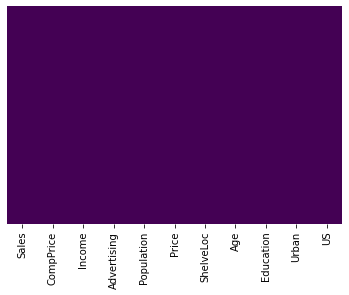

In [20]:
sns.heatmap(company.isnull(),yticklabels=False,cbar=False,cmap='viridis')

DataFrame dont have any null value

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

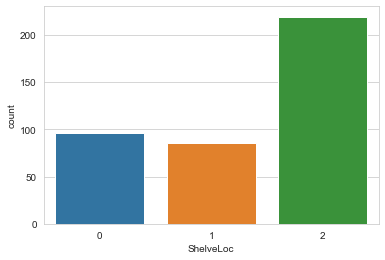

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='ShelveLoc',data=company)

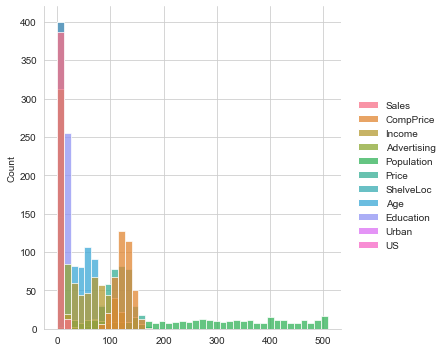

In [27]:
sns.displot(company,kde=False,color='darkred',bins=40)

<AxesSubplot:>

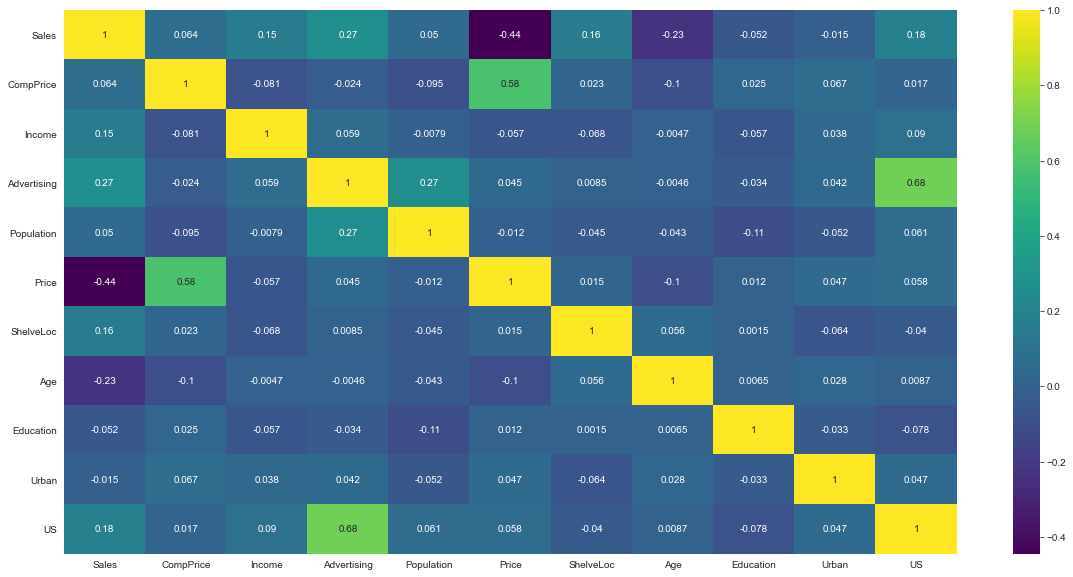

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(data=company.corr(), annot=True, cmap='viridis')

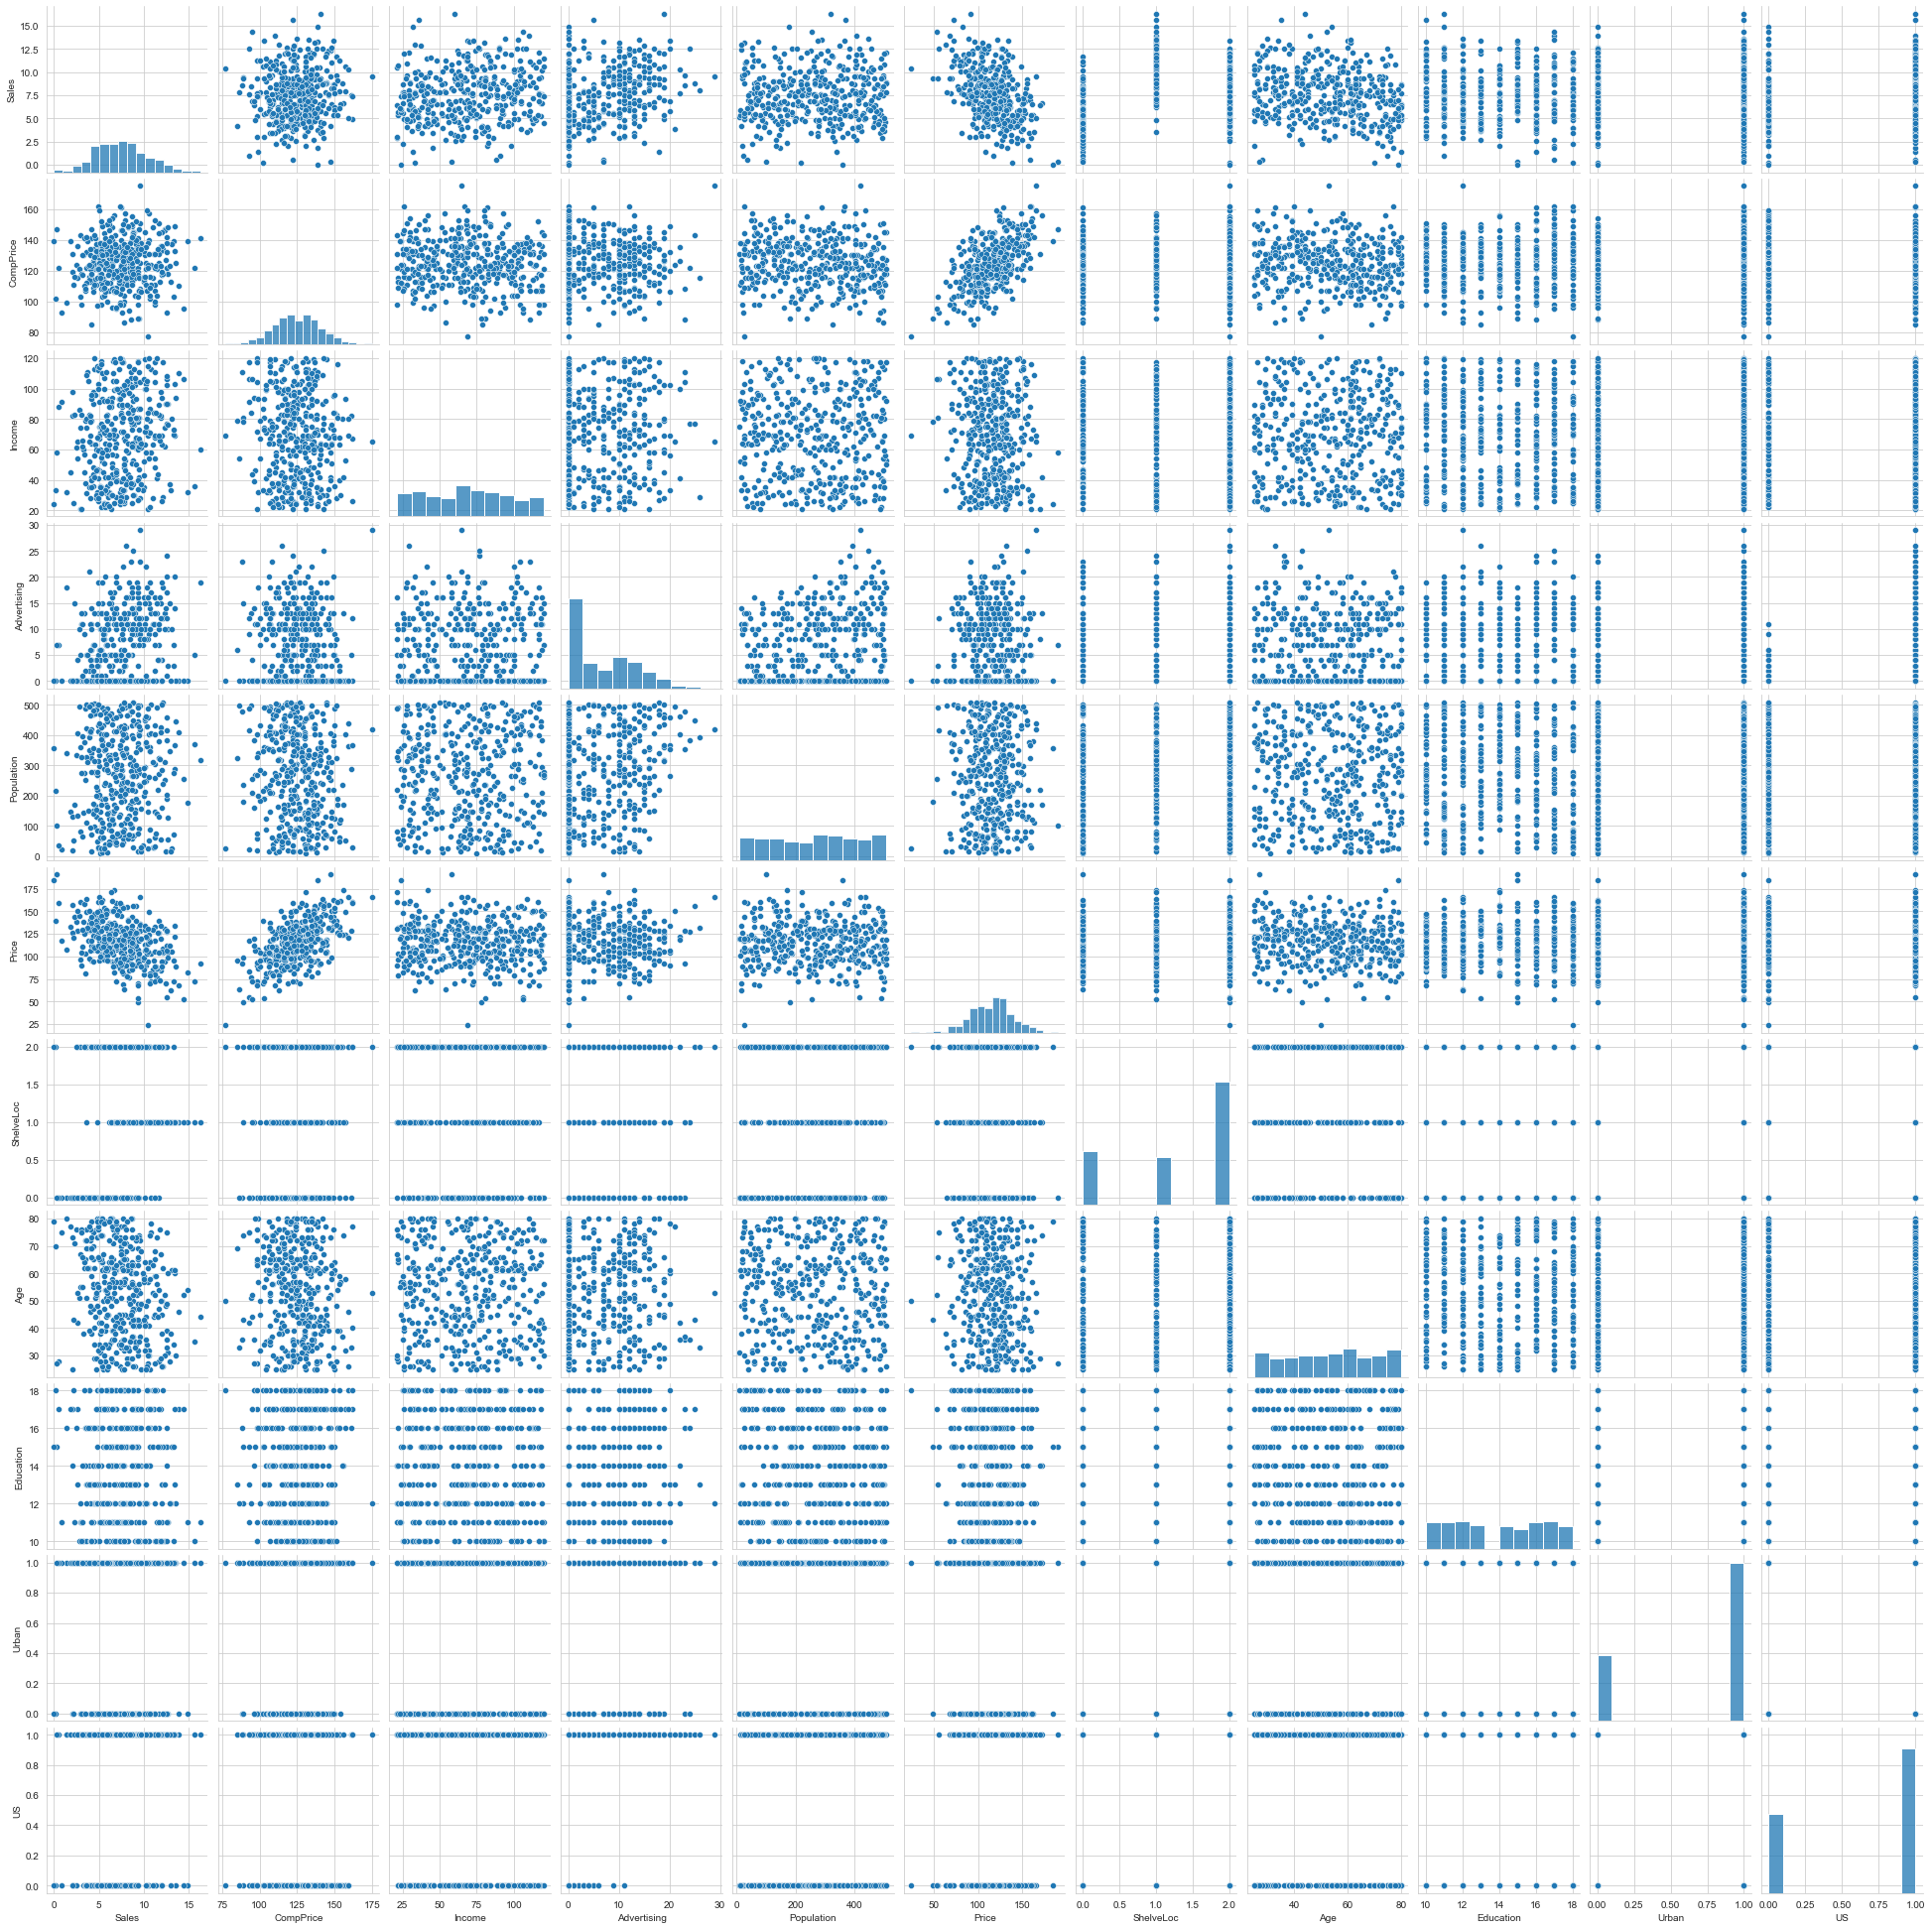

In [34]:
#pair plot
sns.pairplot(company)

In [47]:
df=company.drop(['ShelveLoc'],axis=1)

In [48]:
# Normalize
df1=(df - np.min(df)) / (np.max(df) - np.min(df)).values
df1.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,1.0,1.0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0,1.0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,1.0,1.0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,1.0,1.0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,1.0,0.0


In [53]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
array=df1.values

X = array[:,0:10]
Y = company['ShelveLoc']

num_trees = 100
max_features = 8
kfold = KFold(n_splits=10, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6725


In [54]:
model.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
array = df1.values

X = array[:,0:8]
Y = company['ShelveLoc']

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.6024999999999999


In [56]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

X = array[:,0:10]
Y = company['ShelveLoc']
kfold = KFold(n_splits=10, random_state=None)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.62
